<h2>Exercise 1 for NLP Lab: POS taggers</h2>

<h3>Task 1: Train and evaluate different POS taggers on the English treebank and brown corpora</h3>

<h4>Import corpora and classifiers</h4>

In [29]:
import nltk
from nltk import word_tokenize, pos_tag

from nltk.corpus import brown
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

In [3]:
performances = { 'performancesTreebank': {}, 'performancesBrown': {} }

<h4>Feature extraction (for training classifiers)</h4>

In [30]:
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'prefix-2': '' if len(sentence[index]) == 1 else sentence[index][1],
        'prefix-3': '' if len(sentence[index]) <= 2 else sentence[index][2],
        'suffix-1': sentence[index][-1],
        'suffix-2': '' if len(sentence[index]) == 1 else sentence[index][-2],
        'suffix-3': '' if len(sentence[index])<= 2 else sentence[index][-3],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'length': len(sentence[index]),
        'index_in_sentence': index,
    }
import pprint 
#pprint.pprint(features(['This', 'is', 'a', 'sentence'], 1))

<h4>Make a dataset from the treebank corpus</h4>

In [31]:
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]

annotated_sent = nltk.corpus.treebank.tagged_sents()
untagged_sentences = nltk.corpus.treebank.sents()
cutoff = int(.75 * len(annotated_sent))
training_sentences = annotated_sent[:cutoff]
test_sentences = annotated_sent[cutoff:]
training_sentences_untagged = untagged_sentences[:cutoff]
test_sentences_untagged = untagged_sentences[cutoff:]
 
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
 
    return X, y

<h4>Task 1.1: Train classifier with the extracted features on the treebank corpus</h4>

In [6]:
size=10000

X, y = transform_to_dataset(training_sentences)

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', LogisticRegression())
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(test_sentences)
performances['performancesTreebank'].update({'Classifier': clf.score(X_test, y_test)})

training OK


<h4>Task 1.2: Use the NLTK POS tagger on the treebank corpus</h4>

In [8]:
# use the whole dataset for the pre-trained nltk pos tagger
X_complete, y_complete = transform_to_dataset(annotated_sent)
nltk_tags = []
size = 1000
for sentence in untagged_sentences[:size]:
    sentence_tags = nltk.pos_tag(sentence)
    for word in range(len(sentence)):
        nltk_tags.append(sentence_tags[word][1])
        
# evaluate accuracy
tp = 0
for i in range(len(nltk_tags)):
    if y_complete[i] == nltk_tags[i]:
        tp += 1
performances['performancesTreebank'].update({'NLTK POS Tagger': (tp / len(nltk_tags))})

<h4>Task 1.3: Use the rule-based classifiers on the treebank corpus</h4>

In [9]:
patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

def_model = nltk.DefaultTagger('NN')
uni_model = nltk.UnigramTagger(training_sentences)
bi_model = nltk.BigramTagger(training_sentences)
tri_model = nltk.TrigramTagger(training_sentences)
regexp_model = nltk.RegexpTagger(patterns)

# performance of Default Tagger
performances['performancesTreebank'].update({'Default Tagger': def_model.evaluate(test_sentences)})

# performance of Unigram Tagger
performances['performancesTreebank'].update({'Unigram Tagger': uni_model.evaluate(test_sentences)})

# performance of Bigram Tagger
performances['performancesTreebank'].update({'Bigram Tagger': bi_model.evaluate(test_sentences)})

# performance of Trigram Tagger
performances['performancesTreebank'].update({'Trigram Tagger': tri_model.evaluate(test_sentences)})

# performance of Regex Tagger
performances['performancesTreebank'].update({'Regexp Tagger': regexp_model.evaluate(test_sentences)})

<h4>Task 1.4: Train classifier with the extracted features on the brown corpus</h4>

In [10]:
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

size = int(len(brown_tagged_sents) * 0.9)

training_sentences = brown_tagged_sents[:size]
test_sentences = brown_tagged_sents[size:]

In [11]:
size=10000

X, y = transform_to_dataset(training_sentences)

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', LogisticRegression())
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(test_sentences)
performances['performancesBrown'].update({'Classifier': clf.score(X_test, y_test)})

training OK


<h4>Task 1.5: Use the NLTK POS tagger on the brown corpus</h4>

In [12]:
# use the whole dataset for the pre-trained nltk pos tagger
X_complete, y_complete = transform_to_dataset(brown_tagged_sents)
nltk_tags = []
size = 1000
for sentence in brown_sents[:size]:
    sentence_tags = nltk.pos_tag(sentence)
    for word in range(len(sentence)):
        nltk_tags.append(sentence_tags[word][1])
        
# evaluate accuracy
tp = 0
for i in range(len(nltk_tags)):
    if y_complete[i] == nltk_tags[i]:
        tp += 1
performances['performancesBrown'].update({'NLTK POS Tagger': (tp / len(nltk_tags))})

<h4>Task 1.6: Use the rule-based classifiers on the brown corpus</h4>

In [13]:
patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

def_model = nltk.DefaultTagger('NN')
uni_model = nltk.UnigramTagger(training_sentences)
bi_model = nltk.BigramTagger(training_sentences)
tri_model = nltk.TrigramTagger(training_sentences)
regexp_model = nltk.RegexpTagger(patterns)

# performance of Default Tagger
performances['performancesBrown'].update({'Default Tagger': def_model.evaluate(test_sentences)})

# performance of Unigram Tagger
performances['performancesBrown'].update({'Unigram Tagger': uni_model.evaluate(test_sentences)})

# performance of Bigram Tagger
performances['performancesBrown'].update({'Bigram Tagger': bi_model.evaluate(test_sentences)})

# performance of Trigram Tagger
performances['performancesBrown'].update({'Trigram Tagger': tri_model.evaluate(test_sentences)})

# performance of Regex Tagger
performances['performancesBrown'].update({'Regexp Tagger': regexp_model.evaluate(test_sentences)})

<h4>Plotting the results</h4>

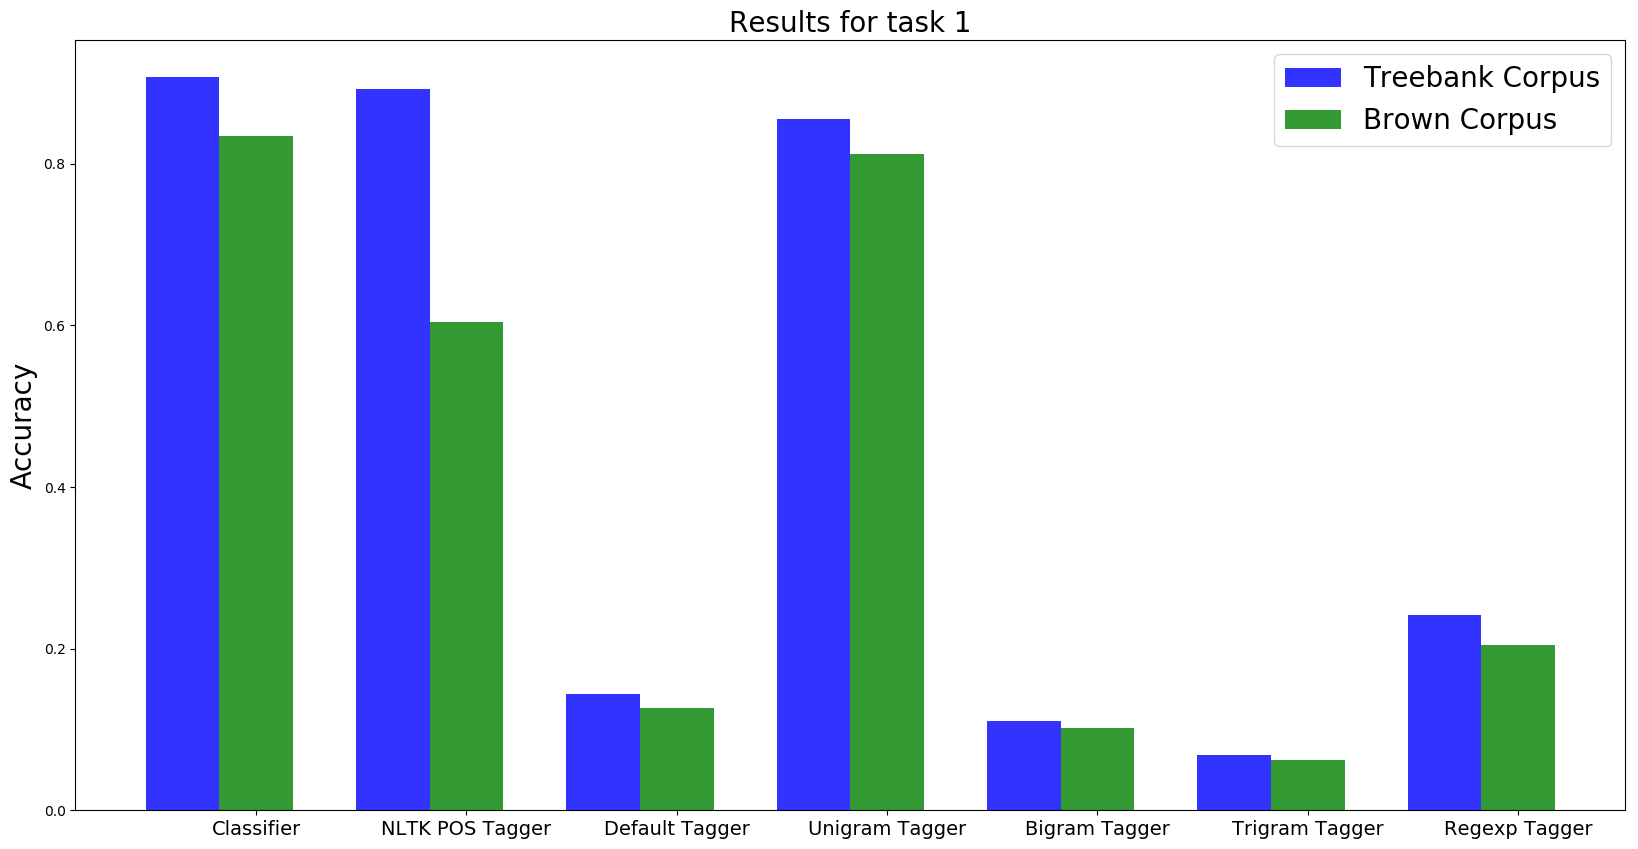

In [15]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np

# data to plot
n_groups = 7
performances_treebank = list(performances['performancesTreebank'].values())
performances_brown = list(performances['performancesBrown'].values())
 
# create plot
fig, ax = plt.subplots(figsize=(20, 10))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, performances_treebank, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Treebank Corpus')
 
rects2 = plt.bar(index + bar_width, performances_brown, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Brown Corpus')
 
plt.ylabel('Accuracy', fontsize=20)
plt.title('Results for task 1', fontsize=20)
plt.xticks(index + bar_width, list(performances['performancesTreebank'].keys()), fontsize=14)
plt.legend(prop={'size': 20})

plt.show()

<h3>Task 2: Train and evaluate POS taggers on a different language</h3>

<h4>Import the Dutch alpino corpus, extract features and build dataset</h4>

In [58]:
from nltk.corpus import alpino

tagged_sentences = alpino.tagged_sents()
untagged_sentences = alpino.sents()
cutoff = int(.75 * len(tagged_sentences))
training_sentences = tagged_sentences[:cutoff]
test_sentences = tagged_sentences[cutoff:]
training_sentences_untagged = untagged_sentences[:cutoff]
test_sentences_untagged = untagged_sentences[cutoff:]

performancesAlpino = {}

<h4>Task 2.1: Train classifier on the extracted features</h4>

In [59]:
size=10000

X, y = transform_to_dataset(training_sentences)

clf = Pipeline([
    ('vectorizer', DictVectorizer(sparse=False)),
    ('classifier', LogisticRegression())
])
clf.fit(X[:size], y[:size])
 
print('training OK')
 
X_test, y_test = transform_to_dataset(test_sentences)
performancesAlpino.update({'Classifier': clf.score(X_test, y_test)})

training OK


<h4>Task 2.2: Use the Spacy POS Tagger on the alpino corpus</h5>

In [60]:
# I used spacy because TreeTagger and RDRPOSTagger did not work for me
import spacy
import numpy as np

nlp = spacy.load('nl')

X_complete, y_complete = transform_to_dataset(tagged_sentences)

# mapping from spacy tags to nltk tags
def tag_mapping(spacy_tag):
    if spacy_tag == 'n':
        return 'noun'
    elif spacy_tag == 'v':
        return 'verb'
    elif spacy_tag == 'punc':
        return 'punct'
    elif spacy_tag == 'art':
        return 'det'
    elif 'prep' in spacy_tag:
        return 'prep'
    elif 'num' in spacy_tag:
        return 'num'
    elif 'adj' in spacy_tag:
        return 'adj'
    elif 'adv' in spacy_tag:
        return 'adv'
    elif 'pron' in spacy_tag:
        return 'pron'
    elif 'conj' in spacy_tag:
        return 'conj'
    elif 'cmp' in spacy_tag:
        return 'comp'
    elif 'propn' in spacy_tag:
        return 'pp'
    else:
        return spacy_tag

tags = []
for sentence in untagged_sentences[:1000]:
    tokens = nlp(' '.join(sentence))
    for token in tokens:
        preprocessed_token = (token.tag_).split('|')[0].lower()
        converted_token = tag_mapping(preprocessed_token)
        tags.append(converted_token)

# evaluate accuracy
tp = 0
for i in range(len(tags)):
    if y_complete[i] == tags[i]:
        tp += 1
performancesAlpino.update({'Spacy POS Tagger': (tp / len(tags))})
print(performancesAlpino)

{'Classifier': 0.8535802327581264, 'Spacy POS Tagger': 0.12924868038083961}


<h4>Plot the results</h4>

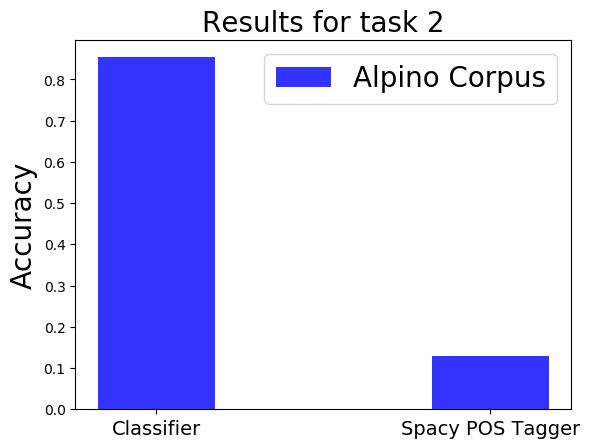

In [70]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np

# data to plot
performances = list(performancesAlpino.values())
 
# create plot
index = np.arange(2)
bar_width = 0.35
opacity = 0.8
 
plt.bar(index, performances, bar_width,
    alpha=opacity,
    color='b',
    label='Alpino Corpus')
 
plt.ylabel('Accuracy', fontsize=20)
plt.title('Results for task 2', fontsize=20)
plt.xticks(index, list(performancesAlpino.keys()), fontsize=14)
plt.legend(prop={'size': 20})

plt.show()